# LangChain: Memory

## Outline
* ConversationBufferMemory
* ConversationBufferWindowMemory
* ConversationTokenBufferMemory
* ConversationSummaryMemory

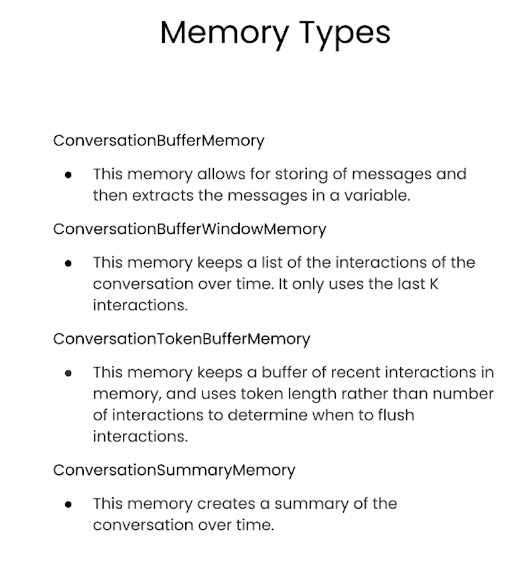

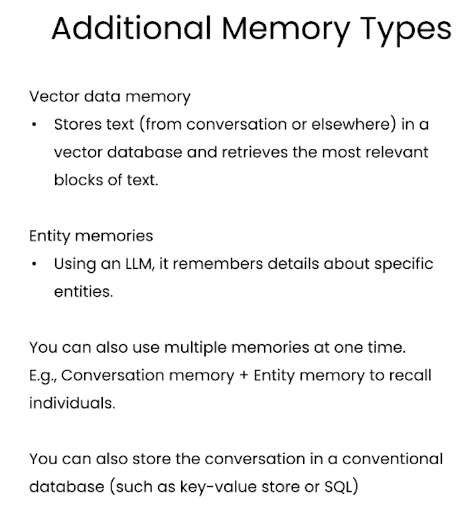

# Step 1 Setup Open API Key

In [1]:
import os
from openai import OpenAI
import warnings
warnings.filterwarnings('ignore')
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.chat_history import InMemoryChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory



In [3]:
# Read API key from text file
with open(r"D:\desktop\Pankaj_New_OpenAI_Key.txt", "r") as file:
    OPENAI_API_KEY = file.read().strip()


## ConversationBufferMemory

Note: LLM's do not always produce the same results. When executing the code in your notebook, you may get slightly different answers that those in the video.

In [5]:
# 1) LLM (keep your existing llm_model variable)
llm = ChatOpenAI(temperature=0.0, 
                 model="gpt-3.5-turbo", 
                 timeout=30,
                openai_api_key=OPENAI_API_KEY)

In [7]:
# 2) Create Memory Store
store = {}

def get_session_history(session_id):
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()
    return store[session_id]


In [9]:
# 3) Prompt with a placeholder for chat history
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant."),
    MessagesPlaceholder(variable_name="history"),
    ("human", "{input}")
])



In [15]:
# 4) Create Chain
chain = prompt | llm

chain

ChatPromptTemplate(input_variables=['history', 'input'], input_types={'history': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[langchain_core.messages.chat.ChatMessageChunk, Tag(tag='ChatMessageChunk')], typing.Annotated[langchain_core.messages.system.SystemMessageChunk, Tag(tag='SystemMessageChunk')], typing.Annotated[langchain_c

In [17]:
# 5) Attach Memory
chat_with_memory = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="input",
    history_messages_key="history"
)


In [21]:
# 6) Run the Conversation
response =chat_with_memory.invoke(
    {"input": "Hi, my name is Andrew"},
    config={"configurable": {"session_id": "user1"}}
)

In [25]:
print(response)

content="Hello Andrew! It seems like you've introduced yourself twice. How can I assist you today?" additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 47, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CyZvauSfMgly5Q3dT83BMfWbKT6J2', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None} id='lc_run--d340b237-90f9-42a9-8192-d07d394700af-0' usage_metadata={'input_tokens': 47, 'output_tokens': 19, 'total_tokens': 66, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


In [23]:
print(response.content)

Hello Andrew! It seems like you've introduced yourself twice. How can I assist you today?


In [27]:
print(response.response_metadata)

{'token_usage': {'completion_tokens': 19, 'prompt_tokens': 47, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CyZvauSfMgly5Q3dT83BMfWbKT6J2', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}


In [29]:
chat_with_memory.invoke(
    {"input": "What is 1+1?"},
    config={"configurable": {"session_id": "user1"}}
)

AIMessage(content='1 + 1 equals 2.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 81, 'total_tokens': 89, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-CyZyt1XxiUygn9SBzAmpkjwROplFB', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--52af4ef4-4011-4163-b6bc-43be0e290c78-0', usage_metadata={'input_tokens': 81, 'output_tokens': 8, 'total_tokens': 89, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [33]:
response_1 = chat_with_memory.invoke(
    {"input": "What is my name?"},
    config={"configurable": {"session_id": "user1"}}
)
print(response_1.content)

Your name is Andrew.


In [39]:
# 7) View Memory
history = store["user1"]
for msg in history.messages:
    print(msg.type, ":", msg.content)


human : Hi, my name is Andrew
ai : Hello Andrew! How can I assist you today?
human : Hi, my name is Andrew
ai : Hello Andrew! It seems like you've introduced yourself twice. How can I assist you today?
human : What is 1+1?
ai : 1 + 1 equals 2.
human : What is my name?
ai : Your name is Andrew.
human : What is my name?
ai : Your name is Andrew.
human : Hi
ai : What's up


In [37]:
# 8) Manual Memory Injection
history = store["user1"]
history.add_user_message("Hi")
history.add_ai_message("What's up")


## ConversationBufferWindowMemory

In [41]:
llm = ChatOpenAI(temperature=0.0, 
                 model="gpt-3.5-turbo", 
                 timeout=30,
                openai_api_key=OPENAI_API_KEY)

In [43]:
store = {}

def get_session_history(session_id):
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()
    return store[session_id]


In [45]:
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant."),
    MessagesPlaceholder(variable_name="history"),
    ("human", "{input}")
])


In [47]:
chain = prompt | llm


In [49]:
def trim_history(history, k=1):
    messages = history.messages
    if len(messages) > 2 * k:
        history.messages = messages[-2 * k:]


In [51]:
chat_with_memory = RunnableWithMessageHistory(
    chain,
    get_session_history,
    input_messages_key="input",
    history_messages_key="history"
)


In [61]:
session_id = "user1"

def invoke_and_trim(text):
    result = chat_with_memory.invoke(
        {"input": text},
        config={"configurable": {"session_id": session_id}}
    )
    trim_history(store[session_id], k=3)
    return result


In [67]:
invoke_and_trim("Hi, my name is Andrew")
invoke_and_trim("What is 1+1?")
invoke_and_trim("What is my name?")


AIMessage(content='Your name is Andrew.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 5, 'prompt_tokens': 92, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Cya4JQl8yBosQ680XUlmNcw4zImqM', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--99f11cdb-cdae-4634-b963-ac6d57b76557-0', usage_metadata={'input_tokens': 92, 'output_tokens': 5, 'total_tokens': 97, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [69]:
for msg in store["user1"].messages:
    print(msg.type, ":", msg.content)


human : Hi, my name is Andrew
ai : Hello Andrew! How can I assist you today?
human : What is 1+1?
ai : 1 + 1 equals 2.
human : What is my name?
ai : Your name is Andrew.


## ConversationTokenBufferMemory

In [ ]:
#!pip install tiktoken

In [121]:
from langchain_openai import ChatOpenAI
from langchain_core.chat_history import InMemoryChatMessageHistory
from langchain_core.messages import HumanMessage, AIMessage
from pydantic import BaseModel, Field
import tiktoken



In [123]:
# Token Counting Helper
def count_tokens(text, model="gpt-3.5-turbo"):
    enc = tiktoken.encoding_for_model(model)
    return len(enc.encode(text))


In [125]:
# Custom Token-Limited History
class TokenLimitedChatHistory(InMemoryChatMessageHistory):
    max_tokens: int = Field(default=10)
    model_name: str = Field(default="gpt-3.5-turbo")

    def total_tokens(self):
        return sum(count_tokens(m.content, self.model_name) for m in self.messages)

    def trim(self):
        while self.total_tokens() > self.max_tokens:
            self.messages.pop(0)



In [127]:
history = TokenLimitedChatHistory(max_tokens=10)


In [129]:
history.add_message(HumanMessage(content="AI is what?!"))
history.add_message(AIMessage(content="Amazing!"))
history.trim()

In [135]:
history.add_message(HumanMessage(content="Backpropagation is what?"))
history.add_message(AIMessage(content="Beautiful!"))
history.trim()

history.add_message(HumanMessage(content="Chatbots are what?"))
history.add_message(AIMessage(content="Charming!"))
history.trim()

In [137]:
history.messages

[AIMessage(content='Beautiful!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Chatbots are what?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Charming!', additional_kwargs={}, response_metadata={})]

In [139]:
for msg in history.messages:
    role = "Human" if msg.type == "human" else "AI"
    print(f"{role}: {msg.content}")


AI: Beautiful!
Human: Chatbots are what?
AI: Charming!


## ConversationSummaryMemory

In [141]:
from langchain_openai import ChatOpenAI
from langchain_core.chat_history import InMemoryChatMessageHistory
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from pydantic import Field
import tiktoken


In [143]:
def count_tokens(text, model="gpt-3.5-turbo"):
    enc = tiktoken.encoding_for_model(model)
    return len(enc.encode(text))


In [145]:
class SummaryChatHistory(InMemoryChatMessageHistory):
    max_tokens: int = Field(default=100)
    model_name: str = Field(default="gpt-3.5-turbo")
    summary: str = Field(default="")

    def total_tokens(self):
        texts = [m.content for m in self.messages]
        texts.append(self.summary)
        return sum(count_tokens(t, self.model_name) for t in texts)

    def add_summary(self, llm):
        conversation_text = "\n".join(
            [f"{'Human' if m.type=='human' else 'AI'}: {m.content}" 
             for m in self.messages]
        )

        prompt = f"Summarize the following conversation briefly:\n{conversation_text}"
        summary_msg = llm.invoke(prompt)
        self.summary = summary_msg.content
        self.messages = []  # Clear detailed history

    def trim(self, llm):
        if self.total_tokens() > self.max_tokens:
            self.add_summary(llm)


In [151]:

history = SummaryChatHistory(max_tokens=100)

history.add_message(HumanMessage(content="Hello"))
history.add_message(AIMessage(content="What's up"))
history.trim(llm)

history.add_message(HumanMessage(content="Not much, just hanging"))
history.add_message(AIMessage(content="Cool"))
history.trim(llm)

history.add_message(HumanMessage(content="What is on the schedule today?"))
history.add_message(AIMessage(content=schedule))
history.trim(llm)


In [153]:
print("Summary:", history.summary)
print("\nRecent messages:")
for msg in history.messages:
    print(msg.type.upper(), ":", msg.content)


Summary: The human and AI discuss the schedule for the day, including a meeting with the product team, work on the LangChain project, and a lunch meeting with a customer to discuss the latest in AI.

Recent messages:


In [149]:
# create a long string
schedule = "There is a meeting at 8am with your product team. \
You will need your powerpoint presentation prepared. \
9am-12pm have time to work on your LangChain \
project which will go quickly because Langchain is such a powerful tool. \
At Noon, lunch at the italian resturant with a customer who is driving \
from over an hour away to meet you to understand the latest in AI. \
Be sure to bring your laptop to show the latest LLM demo."



Reminder: Download your notebook to you local computer to save your work.